In [1]:

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv('SMSSpamCollection',sep="\t",names=['target','message'])

In [49]:
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [50]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


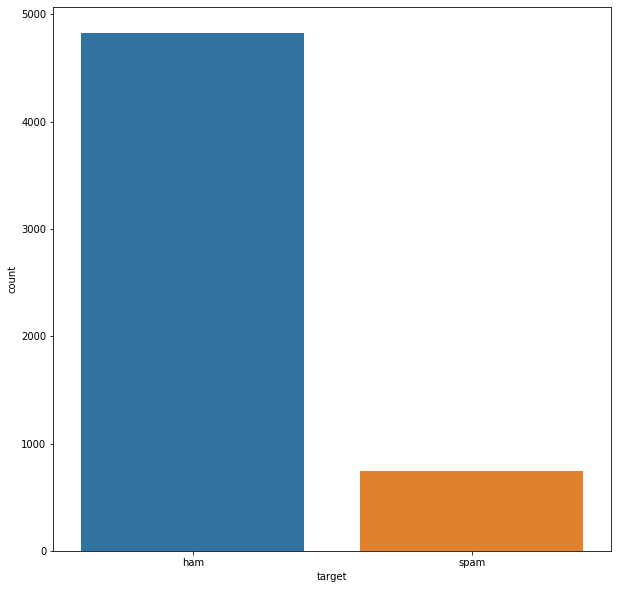

In [51]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x="target")

In [52]:
dfnew= df.select_dtypes(include=['object'])
dfnew.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
from wordcloud import WordCloud,STOPWORDS

In [54]:
df_spam=df.loc[df.target=="spam",:]
df_spam["target"].value_counts()

spam    747
Name: target, dtype: int64

In [55]:
words=" ".join(df.message)

In [56]:
sp_clean_words=" ".join([word for word in words.split()
                      if "http" not in word and not word.startswith("&") and not word.startswith("0")])

In [57]:
sp_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="black",
                      width=1600,
                      height=800).generate(sp_clean_words)

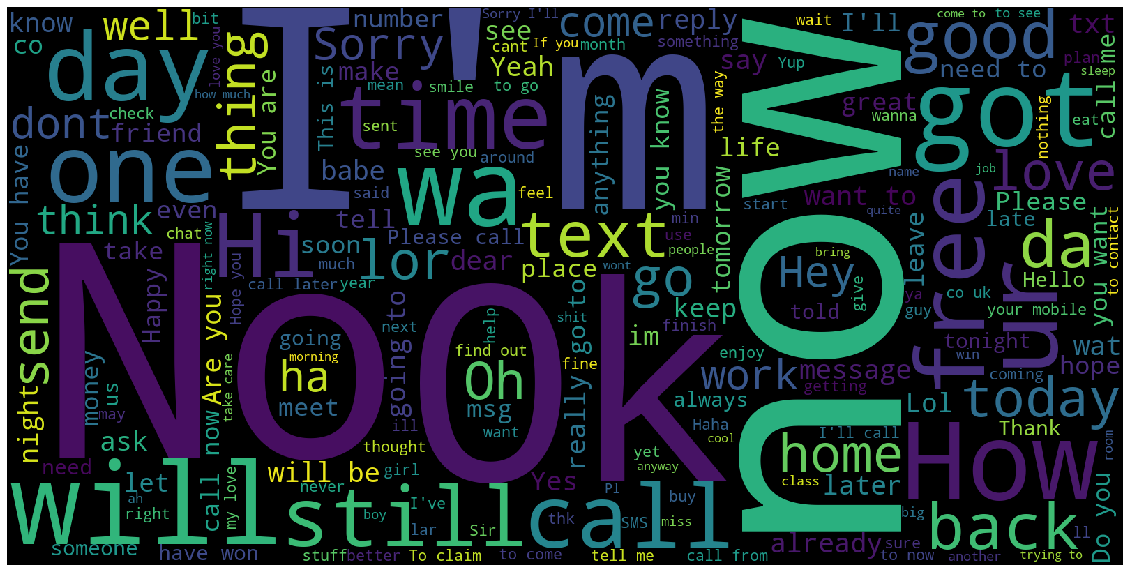

In [58]:
plt.figure(1,figsize=(20,20))
plt.imshow(sp_wordcloud)
plt.axis('off')
plt.show()

In [59]:
df_ham=df.loc[df.target=="ham",:]

df_ham.target.value_counts()

ham    4825
Name: target, dtype: int64

In [60]:
h_words=" ".join(df_ham.message)
h_clean_words=" ".join([word for word in h_words.split() if not word.startswith("&")])
h_wordcloud=WordCloud(stopwords=STOPWORDS,
                     background_color='black',
                     height=1600,
                     width=800).generate(h_clean_words)

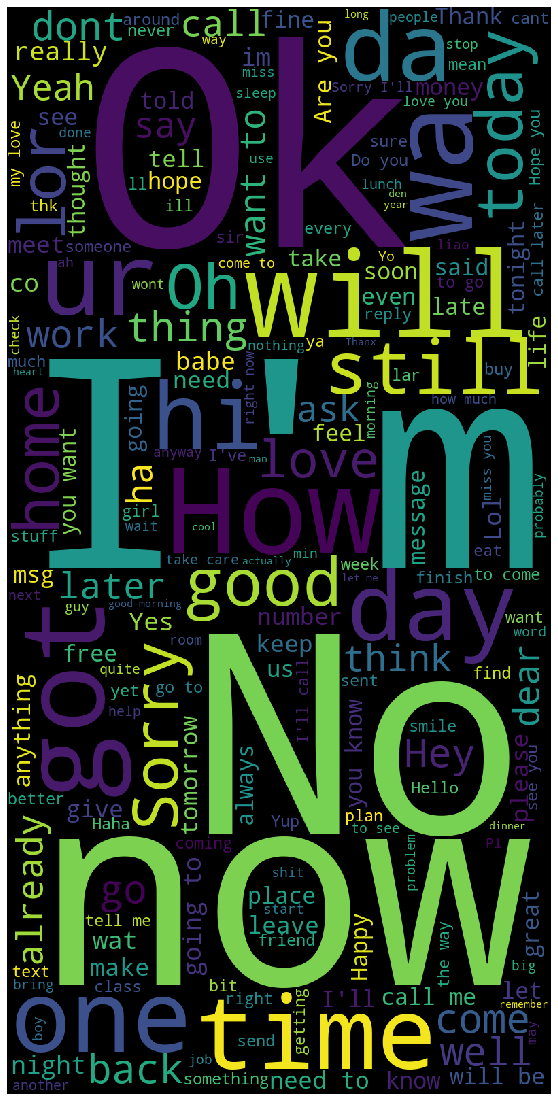

In [61]:
plt.figure(figsize=(30,20))
plt.imshow(h_wordcloud)
plt.axis("off")
plt.show()

In [62]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
stemmer=PorterStemmer()

In [64]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [65]:
def preprocess(raw_message):
    #removing special symbols
    letters_only=re.sub("[^a-zA-Z]"," ",raw_message)
    
    #converting to the lowercase to all
    lower_words=letters_only.lower()
    
    #tokenizing
    words=lower_words.split()
    
    #removing stop words
    words=[word for word in words if not word in stopwords.words("english")] 
    
    #lemmatization 
    words = [lemmatizer.lemmatize(word) for word in words]
    
    
    return(" ".join(words))

In [66]:
df['clean']=df['message'].apply(lambda x:preprocess(x))

In [67]:

from sklearn.model_selection import train_test_split

train,test= train_test_split(df, test_size=0.25, random_state=42)

In [68]:
y_test=test["target"]
print(len(y_test))

1393


In [69]:
print(len(train))
print(len(test))

4179
1393


In [70]:
train_df=[]
for word in train['clean']:
    train_df.append(word)
test_df=[]
for word in test['clean']:
    test_df.append(word)

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(analyzer='word')
train_features=vect.fit_transform(train_df)
test_features=vect.fit_transform(test_df)

In [72]:
vect.vocabulary_

{'squeeeeeze': 2640,
 'christmas': 509,
 'hug': 1358,
 'lik': 1600,
 'frndshp': 1110,
 'den': 721,
 'back': 221,
 'get': 1156,
 'cute': 661,
 'luvd': 1679,
 'lucky': 1674,
 'none': 1925,
 'people': 2064,
 'hate': 1266,
 'also': 84,
 'sorta': 2605,
 'blown': 324,
 'couple': 615,
 'time': 2880,
 'recently': 2281,
 'id': 1380,
 'rather': 2257,
 'text': 2825,
 'blue': 325,
 'looking': 1643,
 'weed': 3129,
 'mmm': 1791,
 'thats': 2836,
 'better': 285,
 'got': 1186,
 'roast': 2364,
 'drink': 811,
 'good': 1181,
 'indian': 1418,
 'mm': 1790,
 'kanji': 1505,
 'dont': 796,
 'eat': 846,
 'anything': 123,
 'heavy': 1283,
 'ok': 1973,
 'ring': 2354,
 'come': 553,
 'guy': 1229,
 'costume': 609,
 'gift': 1161,
 'future': 1124,
 'yowifes': 3267,
 'hint': 1307,
 'sary': 2410,
 'need': 1884,
 'tim': 2879,
 'bollox': 329,
 'hurt': 1367,
 'lot': 1651,
 'tol': 2903,
 'love': 1658,
 'decision': 704,
 'feeling': 1010,
 'could': 612,
 'decide': 701,
 'life': 1594,
 'would': 3215,
 'much': 1843,
 'simpler': 2

In [73]:
print("Total unique words:", len(vect.vocabulary_))

print("Shape of input data", train_features.shape)

Total unique words: 3276
Shape of input data (4179, 6116)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [43]:
train_features=train_features.toarray()
test_features=test_features.toarray()

In [74]:
Classifiers=[LogisticRegression(),
            DecisionTreeClassifier(),
            RandomForestClassifier(n_estimators=200)]
print(train_features.shape)
print(test_features.shape)

(4179, 6116)
(1393, 3276)


In [ ]:
dense_features=train_features.toarray()
dense_test=test_features.toarray()
for classifier in Classifiers:
    fit=classifier.fit(dense_features,train['clean'])
    pred=fit.predict(dense_test)
    accuracy=accuracy_score(pred,test['clean'])
    print('accuracy of' +classifier.__class__.__name__+'is'+str(accuracy))